# Credit Card Fraud Detection

## Fetch Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

In [2]:
base_dir = os.getcwd()
file_path = os.path.join(base_dir, 'data', 'creditcard.csv')
df = pd.read_csv(file_path)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [5]:
def plot_subplots(df: pd.DataFrame, scaled: bool = False) -> None:
    df_copy = df.copy()

    if scaled:
        scaler = StandardScaler()
        df_copy.iloc[:, 1:30] = scaler.fit_transform(df_copy.iloc[:, 1:30])

    plt.figure(figsize = (15, 12))
    plt.subplot(5, 6, 1) ; plt.plot(df_copy.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df_copy.V15)
    plt.subplot(5, 6, 2) ; plt.plot(df_copy.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df_copy.V16)
    plt.subplot(5, 6, 3) ; plt.plot(df_copy.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df_copy.V17)
    plt.subplot(5, 6, 4) ; plt.plot(df_copy.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df_copy.V18)
    plt.subplot(5, 6, 5) ; plt.plot(df_copy.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df_copy.V19)
    plt.subplot(5, 6, 6) ; plt.plot(df_copy.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df_copy.V20)
    plt.subplot(5, 6, 7) ; plt.plot(df_copy.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df_copy.V21)
    plt.subplot(5, 6, 8) ; plt.plot(df_copy.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df_copy.V22)
    plt.subplot(5, 6, 9) ; plt.plot(df_copy.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df_copy.V23)
    plt.subplot(5, 6, 10) ; plt.plot(df_copy.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df_copy.V24)
    plt.subplot(5, 6, 11) ; plt.plot(df_copy.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df_copy.V25)
    plt.subplot(5, 6, 12) ; plt.plot(df_copy.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df_copy.V26)
    plt.subplot(5, 6, 13) ; plt.plot(df_copy.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df_copy.V27)
    plt.subplot(5, 6, 14) ; plt.plot(df_copy.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df_copy.V28)
    plt.subplot(5, 6, 29) ; plt.plot(df_copy.Amount)
    plt.show()


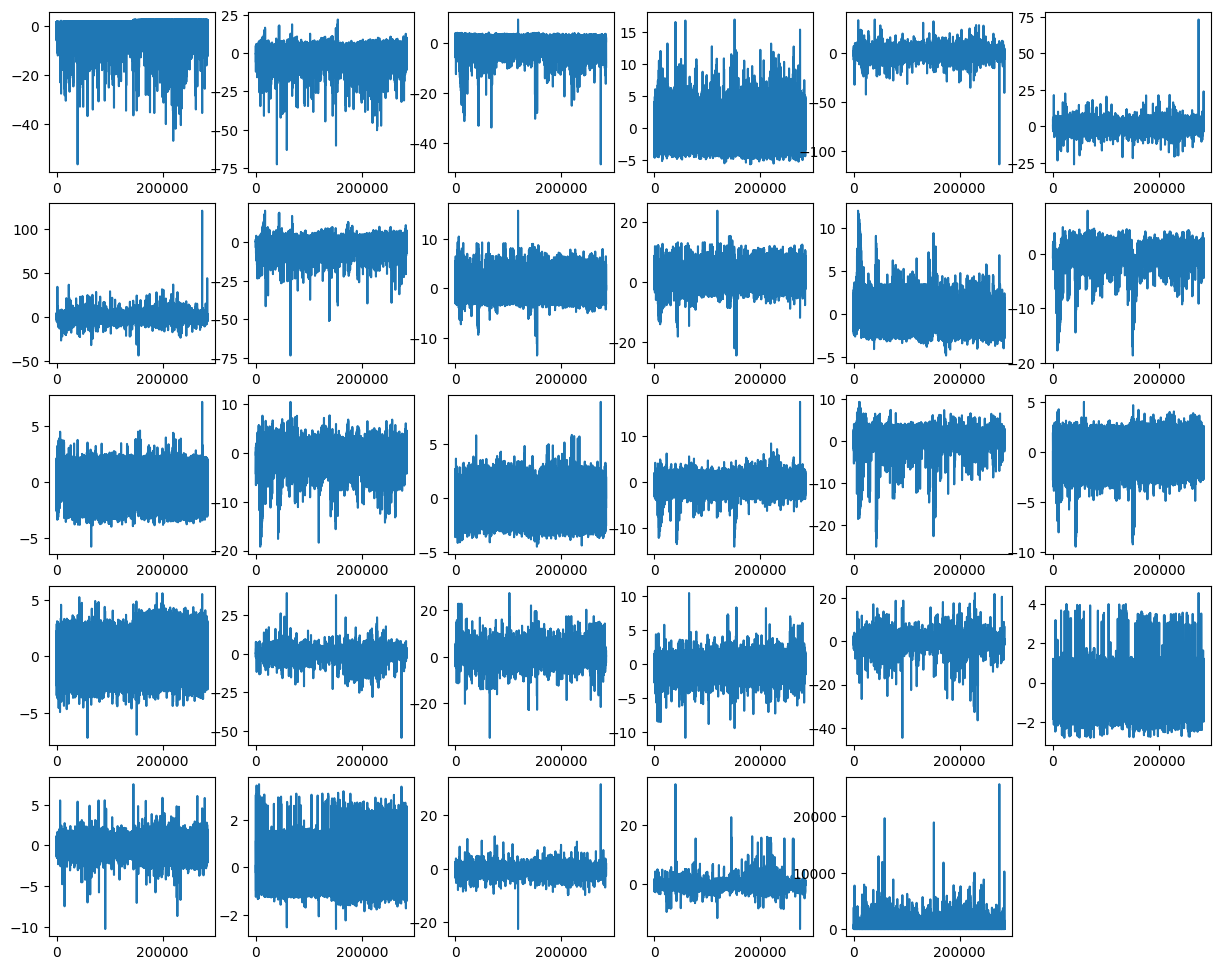

In [6]:
plot_subplots(df)

<Axes: >

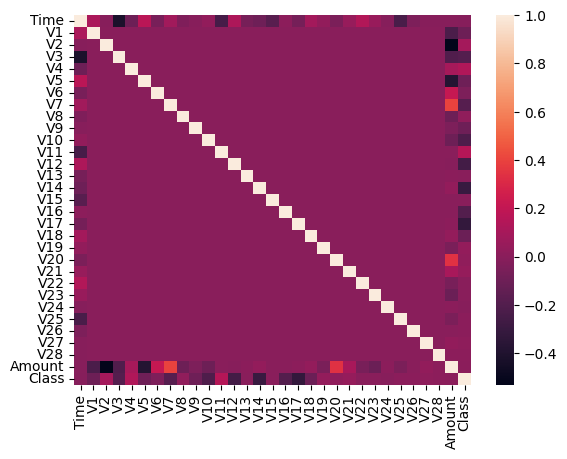

In [7]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


## Classification

### Prepare Data

In [8]:
SEED = 42

feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:, 30: ].columns

data_features = df[feature_names]
data_target = df[target]

scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

X_train, X_test, y_train, y_test = train_test_split(data_features_scaled, data_target, train_size=0.80, test_size=0.20, random_state=SEED)

num_fraud_train = y_train[y_train['Class'] == 1].shape[0]
num_fraud_test = y_test[y_test['Class'] == 1].shape[0]

print(f"Number of fraudulent transactions in training set: {num_fraud_train}")
print(f"Number of fraudulent transactions in test set: {num_fraud_test}")


Number of fraudulent transactions in training set: 394
Number of fraudulent transactions in test set: 98


### Train Models

In [9]:
# Initialize Base Models
log_reg = LogisticRegression(random_state=SEED)
gbc = GradientBoostingClassifier(random_state=SEED)
rfc = RandomForestClassifier(random_state=SEED)

# Train Base Models
log_reg.fit(X_train, y_train.values.ravel())
gbc.fit(X_train, y_train.values.ravel())
rfc.fit(X_train, y_train.values.ravel())

# Generate Predictions for AdaBoost (Stacking)
train_preds = pd.DataFrame({
    "log_reg": log_reg.predict(X_train),
    "gbc": gbc.predict(X_train),
    "rfc": rfc.predict(X_train)
})

test_preds = pd.DataFrame({
    "log_reg": log_reg.predict(X_test),
    "gbc": gbc.predict(X_test),
    "rfc": rfc.predict(X_test)
})

# Train AdaBoost on Stacked Predictions
ada = AdaBoostClassifier(random_state=SEED)
ada.fit(train_preds, y_train.values.ravel())


AdaBoostClassifier(random_state=42)

### Predict

In [10]:
# Final Predictions
final_pred = ada.predict(test_preds)

# Evaluate Performance
precision = round(precision_score(y_test, final_pred), 2)
recall = round(recall_score(y_test, final_pred), 2)
f1 = round(f1_score(y_test, final_pred), 2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.97
Recall: 0.77
F1 Score: 0.86


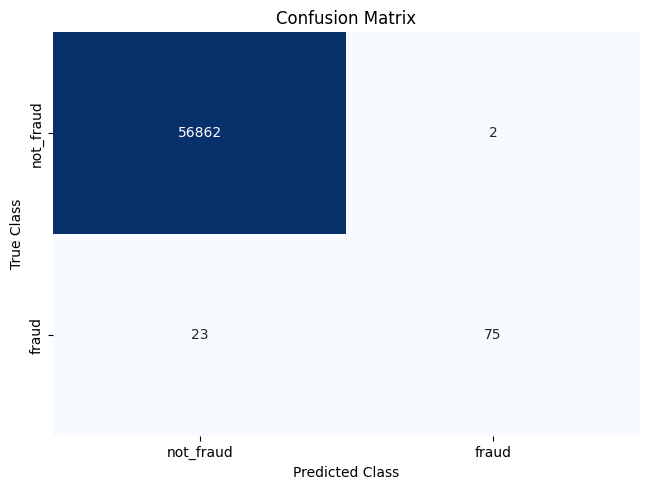

In [11]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, final_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
